<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_7_Assignments_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import datasets

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
# Download the Oxford IIIT Pet Dataset using the in-built pytorch datasets library
# train_split
raw_train_dataset = torchvision.datasets.OxfordIIITPet(root='./data/oxford-pets', download=True)

# test_split
raw_test_dataset = torchvision.datasets.OxfordIIITPet(root='./data/oxford-pets', split='test', download=True)

print(len(raw_train_dataset))
print(len(raw_test_dataset))

100%|██████████| 791918971/791918971 [00:27<00:00, 28314265.15it/s]


Extracting data/oxford-pets/oxford-iiit-pet/images.tar.gz to data/oxford-pets/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 12216318.80it/s]


Extracting data/oxford-pets/oxford-iiit-pet/annotations.tar.gz to data/oxford-pets/oxford-iiit-pet
3680
3669


In [ ]:
classes = raw_train_dataset.classes

# Print class names
print("Class labels and their corresponding names:")
for idx, class_name in enumerate(classes):
    print(f"Label {idx}: {class_name}")

Class labels and their corresponding names:
Label 0: Abyssinian
Label 1: American Bulldog
Label 2: American Pit Bull Terrier
Label 3: Basset Hound
Label 4: Beagle
Label 5: Bengal
Label 6: Birman
Label 7: Bombay
Label 8: Boxer
Label 9: British Shorthair
Label 10: Chihuahua
Label 11: Egyptian Mau
Label 12: English Cocker Spaniel
Label 13: English Setter
Label 14: German Shorthaired
Label 15: Great Pyrenees
Label 16: Havanese
Label 17: Japanese Chin
Label 18: Keeshond
Label 19: Leonberger
Label 20: Maine Coon
Label 21: Miniature Pinscher
Label 22: Newfoundland
Label 23: Persian
Label 24: Pomeranian
Label 25: Pug
Label 26: Ragdoll
Label 27: Russian Blue
Label 28: Saint Bernard
Label 29: Samoyed
Label 30: Scottish Terrier
Label 31: Shiba Inu
Label 32: Siamese
Label 33: Sphynx
Label 34: Staffordshire Bull Terrier
Label 35: Wheaten Terrier
Label 36: Yorkshire Terrier


In [ ]:
breed_to_image = {}

for image_file, breed in raw_train_dataset:
    if breed not in breed_to_image:
        breed_to_image[breed] = image_file


print(len(breed_to_image))

37


<class 'PIL.Image.Image'>


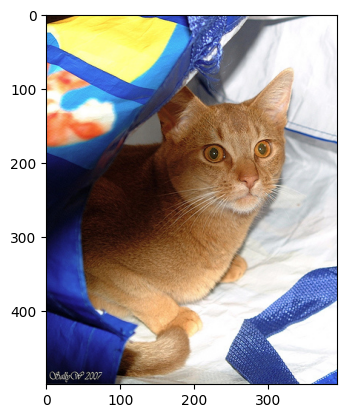

In [ ]:
print(type(breed_to_image[1]))
plt.imshow(breed_to_image[0])

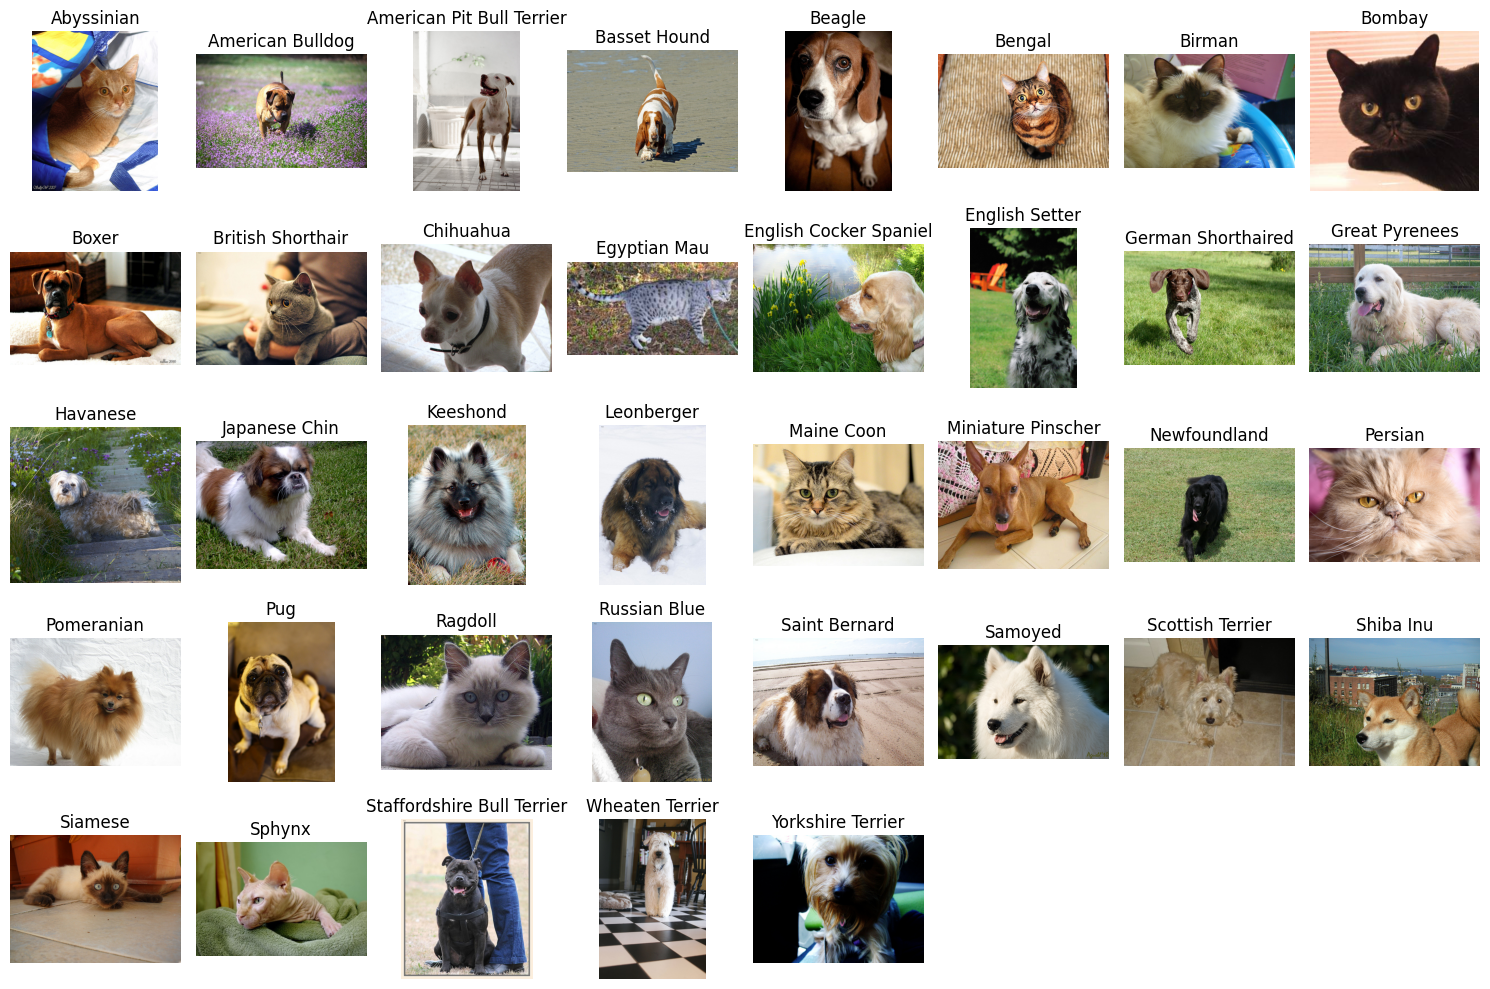

In [ ]:
from PIL import Image

# Plot one image per class
plt.figure(figsize = (15, 10))
for breed in breed_to_image:
    plt.subplot(5, 8, breed+1)
    plt.imshow(breed_to_image[breed])
    plt.title(classes[breed])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Convert labels to a DataFrame
label_df = pd.DataFrame(raw_train_dataset._labels, columns=['Breed'])

# Use OneHotEncoder to encode breed names into one-hot vectors
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(label_df[['Breed']])

# Output encoded labels
print("One-Hot Encoded Labels:")
print(len(y[0]))
print(y[:5])


One-Hot Encoded Labels:
37
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


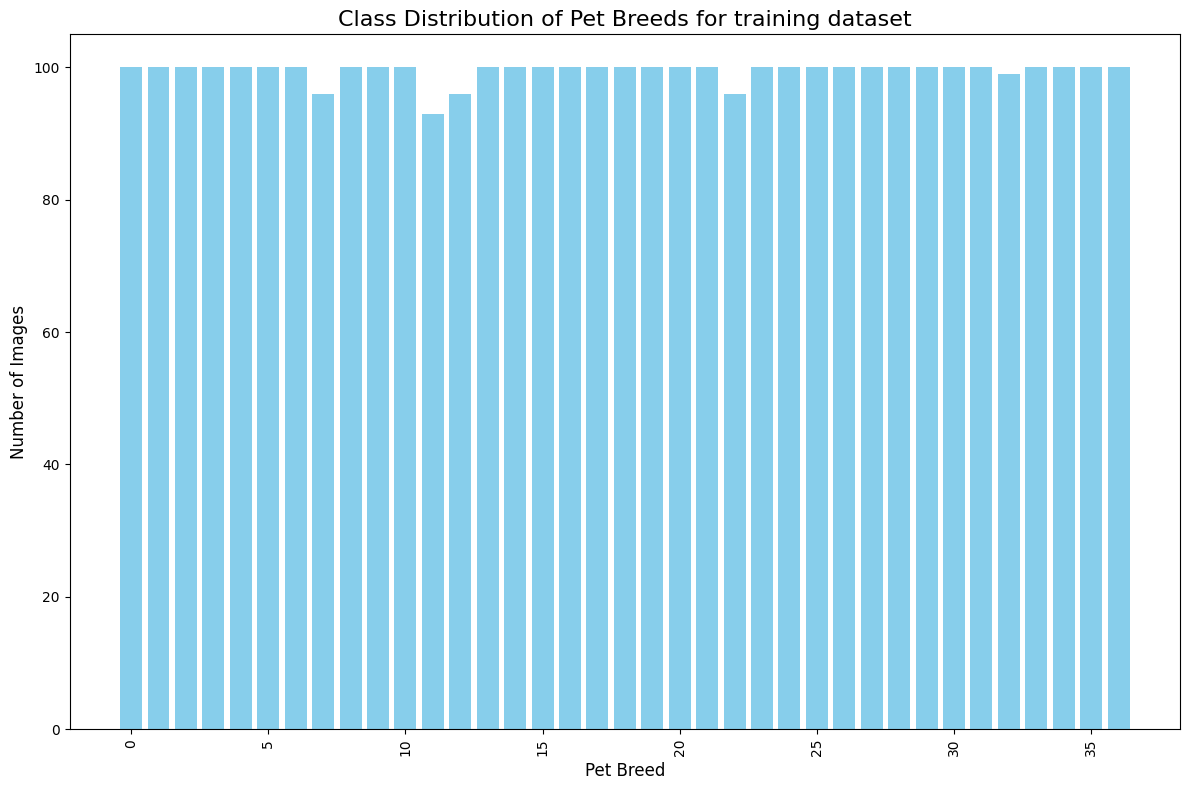

In [ ]:
from collections import Counter

# Count the occurrence of each class
class_counts = Counter(raw_train_dataset._labels)

# Convert the class counts to a DataFrame for easier plotting
class_distribution_df = pd.DataFrame(class_counts.items(), columns=['Breed', 'Count'])

# Plot a bar graph showing the class distribution
plt.figure(figsize=(12, 8))
plt.bar(class_distribution_df['Breed'], class_distribution_df['Count'], color='skyblue')
plt.xlabel('Pet Breed', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution of Pet Breeds for training dataset', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

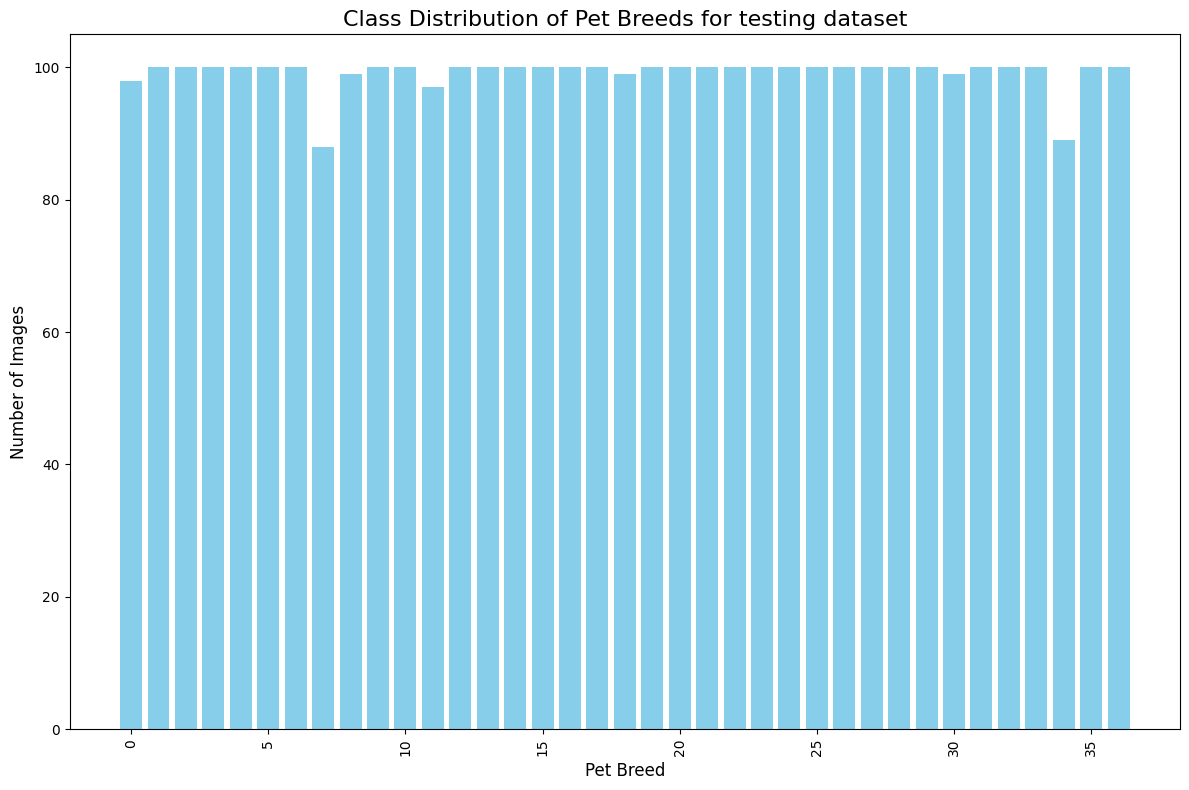

In [ ]:
from collections import Counter

# Count the occurrence of each class
class_counts = Counter(raw_test_dataset._labels)

# Convert the class counts to a DataFrame for easier plotting
class_distribution_df = pd.DataFrame(class_counts.items(), columns=['Breed', 'Count'])

# Plot a bar graph showing the class distribution
plt.figure(figsize=(12, 8))
plt.bar(class_distribution_df['Breed'], class_distribution_df['Count'], color='skyblue')
plt.xlabel('Pet Breed', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution of Pet Breeds for testing dataset', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
class preprocessDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        image, target = self.dataset[index][0],self.dataset[index][1]
        augmented_image = self.transform(image)
        return augmented_image, target

In [ ]:
print(len(raw_train_dataset))

3680


In [ ]:
import torchvision
import torch
from torch.utils.data import random_split


# Define the train-validation split ratio
train_size = int(0.85 * len(raw_train_dataset))
val_size = len(raw_train_dataset) - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(raw_train_dataset, [train_size, val_size])

# Check the sizes
print(f'Training set size: {len(train_dataset)}')
print(f'Validation set size: {len(val_dataset)}')

Training set size: 3128
Validation set size: 552


In [ ]:
train_data = preprocessDataset(train_dataset,transform = train_transform)
val_data = preprocessDataset(val_dataset,transform = val_transform)
test_data = preprocessDataset(raw_test_dataset,transform = val_transform)

In [ ]:
print("Dataset sizes:")
print(f"Training set: {len(train_data)}")
print(f"Validation set: {len(val_data)}")
print(f"Test set: {len(test_data)}")

Dataset sizes:
Training set: 3128
Validation set: 552
Test set: 3669


In [ ]:
from torch.utils.data import DataLoader

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)


# Check if DataLoaders are working
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [ ]:
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [ ]:
print(images.shape)
print(labels.shape)

torch.Size([16, 3, 128, 128])
torch.Size([16])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # Adjust input features based on image size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 37)  # Output layer for 10 classes (CIFAR-10)

    def forward(self, x):
        # Convolutional layers with ReLU activation

        x = F.relu(self.conv1(x))
        x = self.maxpool(x)

        x = F.relu(self.conv2(x))
        x = self.maxpool(x)

        x = F.relu(self.conv3(x))
        x = self.maxpool(x)

        x = F.relu(self.conv4(x))
        x = self.maxpool(x)

        x = x.view(x.size(0), -1)

        # Flattening
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [ ]:
import torch

tensor = torch.randn(16, 3, 128, 128)
num_classes = 37
model = SimpleCNN()

y = model(tensor)
print(model)
y.shape

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=37, bias=True)
)


torch.Size([16, 37])

In [ ]:
def save_model(model,epoch, name=''):
    now = datetime.datetime.now()
    now = now + datetime.timedelta(hours=5, minutes=30)
    date_time = now.strftime("%Y-%m-%d_%H-%M-%S")

    torch.save(model.state_dict(), f'model_{name}_epoch[{epoch}]_{date_time}.pt')

def evaluate_model(model, dataloader):
    model.eval()  # Set the model to evaluation mode

    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Update statistics
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

def early_stop(val_loss, val_history, patience):
    if val_loss < val_history['best']:
        val_history['best'] = val_loss
        val_history['no_improvement'] = 0
    else:
        val_history['no_improvement'] += 1

    if val_history['no_improvement'] >= patience:
        return True

    return False

def train_model(model, dataloader, num_epochs, device,early_stop_patience, history, val_history):

    current_lr = optimizer.param_groups[0]['lr']
    best_val = 0

    # Traning loop
    for epoch in range(num_epochs):

        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        for images, labels in dataloader:
            # load the batch to GPU
            images, labels = images.to(device), labels.to(device)

            # Zero your gradients for every batch!
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)

            # Backward pass
            loss = criterion(outputs, labels)
            loss.backward()

            # Update weights
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        accuracy = correct_predictions / total_samples
        total_loss = total_loss/len(dataloader)

        val_loss, val_accuracy = evaluate_model(model, val_loader)

        # save the best model so far
        if best_val < val_accuracy and val_accuracy > 0.92:
            best_val = val_accuracy
            save_model(model,epoch+1, 'm'+str(int(10000* val_accuracy)))

        if (epoch+1)%1 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], LR: {current_lr}, ', end='')
            print(f'train_loss: {total_loss:.5f}, train_acc: {accuracy:.5f}, ', end='')
            print(f'val_loss: {val_loss:.5f}, val_acc: {val_accuracy:.5f}')

        if early_stop(val_loss, val_history, early_stop_patience):
            print(f"Stopped due to no improvement for {val_history['no_improvement']} epochs")
            save_model(model,epoch+1,'m')
            break

        model.train(True) # Switch back to training mode

        # Update the learning rate
        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']

        history['train_loss'].append(total_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(accuracy)
        history['val_acc'].append(val_accuracy)

        if (epoch+1) % 10 == 0:
            save_model(model, epoch+1,'m')

In [ ]:
# Training

num_epochs = 500           # number of epochs to train
learning_rate = 0.015     # initial Learning rate
early_stop_patience = 5   # number of epochs
lr_factor = 0.4
lr_scheduler_patience = 4  # number of epochs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN()
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=lr_factor, patience=lr_scheduler_patience)

history = {'train_loss':[],'val_loss':[], 'train_acc':[], 'val_acc':[]}
val_history = {'best': 1e9, 'no_improvement':0}

train_model(model, train_loader, num_epochs, device,early_stop_patience, history, val_history)

Epoch [1/500], LR: 0.015, train_loss: 3.61297, train_acc: 0.03261, val_loss: 3.61231, val_acc: 0.01449
Epoch [2/500], LR: 0.015, train_loss: 3.61237, train_acc: 0.02781, val_loss: 3.61327, val_acc: 0.01449
Epoch [3/500], LR: 0.015, train_loss: 3.61169, train_acc: 0.02621, val_loss: 3.61338, val_acc: 0.01812
Epoch [4/500], LR: 0.015, train_loss: 3.60999, train_acc: 0.03197, val_loss: 3.61360, val_acc: 0.01449
Epoch [5/500], LR: 0.015, train_loss: 3.60721, train_acc: 0.02749, val_loss: 3.61384, val_acc: 0.01449
Epoch [6/500], LR: 0.015, train_loss: 3.60424, train_acc: 0.03229, val_loss: 3.61015, val_acc: 0.02717
Epoch [7/500], LR: 0.015, train_loss: 3.60026, train_acc: 0.03645, val_loss: 3.60505, val_acc: 0.02717
Epoch [8/500], LR: 0.015, train_loss: 3.58468, train_acc: 0.04891, val_loss: 3.58495, val_acc: 0.03442
Epoch [9/500], LR: 0.015, train_loss: 3.57711, train_acc: 0.04156, val_loss: 3.55719, val_acc: 0.04529
Epoch [10/500], LR: 0.015, train_loss: 3.56252, train_acc: 0.04987, val_l

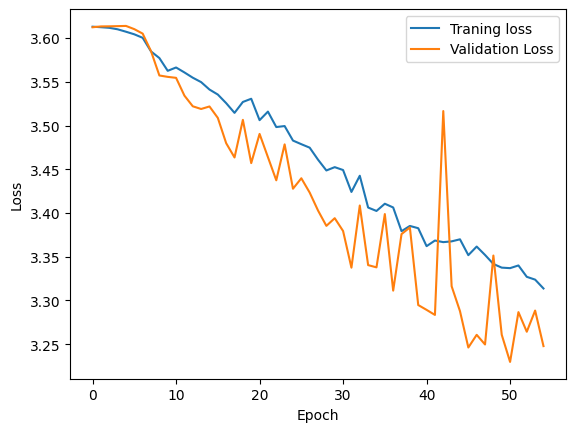

In [ ]:
plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.legend(['Traning loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

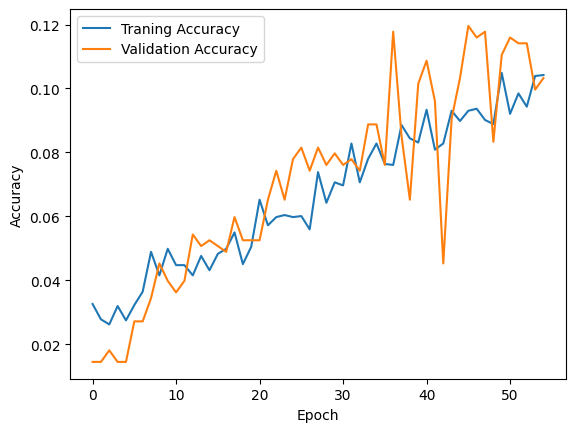

In [ ]:
plt.plot(history['train_acc'])
plt.plot(history['val_acc'])
plt.legend(['Traning Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Evaluate on test_dataset
loss, acc = evaluate_model(model, test_loader)
print(f'test_loss: {loss}, test_acc: {acc*100:.3f}%')

test_loss: 3.1923790957616722, test_acc: 11.175%


100%|██████████| 230/230 [00:24<00:00,  9.24it/s]


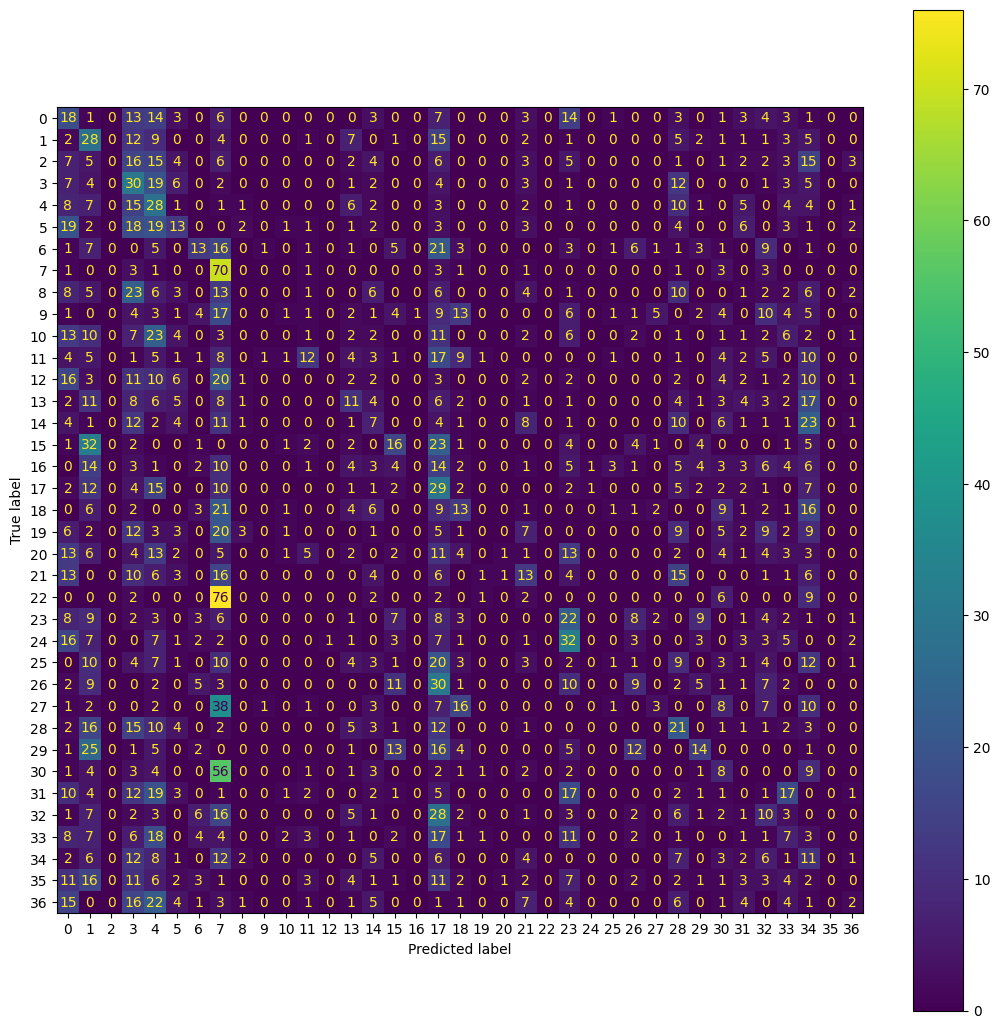

In [ ]:
def view_confusion_matrix(model, test_loader, figsize=(15,15)):
    model.eval()  # Set the model to evaluation mode
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    test_labels = []
    preds = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            test_labels.append(labels.cpu().numpy())
            preds.append(predicted.cpu().numpy())

    test_labels = np.concatenate(test_labels,axis=0)
    preds = np.concatenate(preds,axis=0)

    cm = confusion_matrix(test_labels, preds, labels=[i for i in range(37)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[i for i in range(37)])

    fig, ax = plt.subplots(figsize=figsize)
    disp.plot(ax=ax)
    plt.show()

view_confusion_matrix(model, test_loader, figsize=(13,13))